The Home Credit Default Risk involves creating a predictive model to assess the likelihood of a customer defaulting on a loan.
### 1. What to Learn and What to Predict
- Goal: The task is to predict the probability of a loan applicant defaulting on their loan repayment.
- Input Data: Includes a variety of socio-demographic, financial, and application data for loan applicants.
- Output: A probability score (between 0 and 1) indicating the likelihood of default for each applicant.
### 2. File Format for Submission
- Submission File: A CSV file with the following format:
  - Column 1: `SK_ID_CURR` (unique ID of each loan applicant)
  - Column 2: `TARGET` (predicted probability of default, a value between 0 and 1)
### 3. Evaluation Metric
- Submissions are evaluated using ROC-AUC (Area Under the Receiver Operating Characteristic Curve)
  - ROC-AUC: Measures the model('s ability to distinguish between classes (defaults vs. non-defaults). '
                                    'A score of 0.5 indicates random guessing, while a score closer to 1.0 indicates better performance.)

### 4. Baseline Model Creation
A simple baseline model can be built using logistic regression.

### Key Notes
- Baseline Performance: The goal of the baseline model is to create a functional pipeline. Accuracy can be improved later through feature engineering, hyperparameter tuning, and using advanced models.
- Feature Selection: For simplicity, only numerical features are used in the baseline. Categorical features and feature engineering can be included for better results in future iterations.

In [15]:
import numpy as np
import pandas as pd
from pygments.lexer import default
from seaborn import regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# loading the dataset
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

# checking the data
print(train.head())
print(test.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0             

In [16]:
import pandas as pd

# loading the dataset
df_original = pd.read_csv('application_train.csv')
df_original.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df_original.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [18]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Load data
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

# Preprocessing
X = train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train['TARGET']

# Fill missing values for numeric columns only
numeric_columns = X.select_dtypes(include=['number']).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].median())

# One-hot encoding for categorical columns
X = pd.get_dummies(X)

# Repeat the process for the test dataset
test_numeric_columns = test.select_dtypes(include=['number']).columns
test[test_numeric_columns] = test[test_numeric_columns].fillna(test[test_numeric_columns].median())
test = pd.get_dummies(test)

# Align test data columns with training data
test = test.reindex(columns=X.columns, fill_value=0)

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline model: Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Validate the model
y_pred = model.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_pred)
print(f"Validation AUC: {auc_score:.4f}")

# Prediction on test data
test_pred = model.predict_proba(test)[:, 1]

# Create submission file
submission = pd.DataFrame({'SK_ID_CURR': test.index, 'TARGET': test_pred})
submission.to_csv('baseline_submission.csv', index=False)
print(submission.head())
print(f"Submission file saved")


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation AUC: 0.6280
   SK_ID_CURR    TARGET
0           0  0.060267
1           1  0.112868
2           2  0.071306
3           3  0.025773
4           4  0.081814
Submission file saved


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
Missing values in training data:
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64


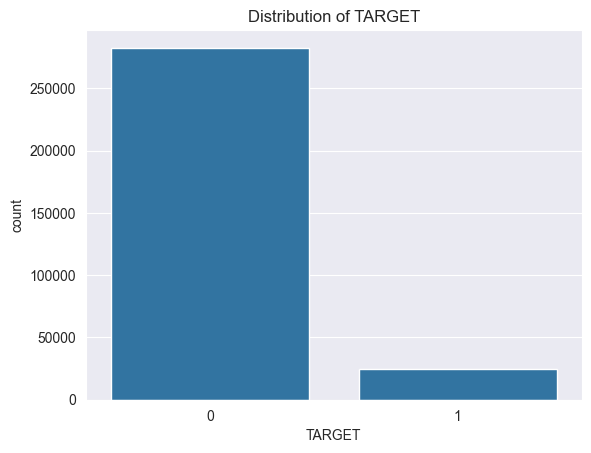

Validation ROC AUC: 0.7097
Submission file created: submission.csv


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Step 1: Load and Analyze Data
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

# Display basic information
print("Training data info:")
print(train.info())
print("Missing values in training data:")
print(train.isnull().sum().sort_values(ascending=False)[:10])

# Visualize target distribution
sns.countplot(x='TARGET', data=train)
plt.title('Distribution of TARGET')
plt.show()

# Step 2: Preprocessing
# Separate features and target
X = train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train['TARGET']

# Handle missing values
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
test[numeric_cols] = test[numeric_cols].fillna(X[numeric_cols].median())

# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Align test data with training data
test = test.reindex(columns=X.columns, fill_value=0)

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_valid[numeric_cols] = scaler.transform(X_valid[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

# Step 3: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Validate the Model
y_valid_pred = model.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_valid_pred)
print(f"Validation ROC AUC: {auc_score:.4f}")

# Step 5: Prediction and Submission
test_pred = model.predict_proba(test)[:, 1]

# Create submission file
submission = pd.DataFrame({'SK_ID_CURR': test.index, 'TARGET': test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Load Data
train = pd.read_csv('application_train.csv')
test = pd.read_csv('application_test.csv')

# Separate features and target
X = train.drop(columns=['TARGET', 'SK_ID_CURR'])
y = train['TARGET']

# Handle missing values
numeric_cols = X.select_dtypes(include=['number']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].median())
test[numeric_cols] = test[numeric_cols].fillna(X[numeric_cols].median())

# One-hot encoding for categorical columns
X = pd.get_dummies(X, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

# Align test data with training data
test = test.reindex(columns=X.columns, fill_value=0)

# Train-validation split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_valid[numeric_cols] = scaler.transform(X_valid[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

# Step 2: Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 3: Predict on Test Data
test_pred = model.predict_proba(test)[:, 1]

# Step 4: Create Submission File
submission = pd.DataFrame({'SK_ID_CURR': test.index, 'TARGET': test_pred})
submission.to_csv('submission.csv', index=False)
print("Submission file created: submission.csv")


Submission file created: submission.csv


In [21]:
df_original.describe()


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [22]:
# deleting features with missing values
missing_counts = df_original.isnull().sum()
# identify columns with 5 or more missing values in each column
columns_to_drop = missing_counts[missing_counts >= 5].index
# delete
df =df_original.drop(columns=columns_to_drop)
# identify rows with missing values
lines_to_drop = df[df.isnull().any(axis=1)].index
# deleting the identified values
df = df.drop(index=lines_to_drop)
print(df.head())


   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0               Y             0          202500.0    406597.5   
1               N             0          270000.0   1293502.5   
2               Y             0           67500.0    135000.0   
3               Y             0          135000.0    312682.5   
4               Y             0          121500.0    513000.0   

  NAME_INCOME_TYPE  ... FLAG_DOCUMENT_12 FLAG_DOCUMENT_13 FLAG_DOCUMENT_14  \
0          Working  ...                0                0                0   
1    State servant  ...               

In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

# dividing data into testing and validation data
y = df["TARGET"]
X = df.drop("TARGET", axis=1)
# when using only the numerical data
X = X.select_dtypes(include=[np.number])
# splitting the data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# creating an instance for logistic regression
model = LogisticRegression(random_state=0, max_iter=10000)
# fitting the model to the training data
model.fit(X_train, y_train)
# predicting using the validation data
y_pred_val = model.predict(X_val)
# calculating ROC AUC
roc_auc = roc_auc_score(y_val, y_pred_val)
print(f"ROC AUC(Validation): {roc_auc}")

# loading test data
df_test = pd.read_csv('application_test.csv')

# preprocessing the test data
df_test = df_test.drop(columns=columns_to_drop)
# handling missing value
for col in df_test.columns:
    if df_test[col].isnull().any():
        if df_test[col].dtype == 'object':
            df_test[col].fillna(df_test[col].mode()[0])
        else:
            df_test[col].fillna(df_test[col].mean())
# using only the numerical data
X_test = df_test.select_dtypes(include=[np.number])
# adjusting to use only the identical columns
X_test = X_test[X_train.columns]
# predicting using test data
y_pred_test = model.predict_proba(X_test)[:, 1]
# creating data frame for submission
submission = pd.DataFrame({'SK_ID_CURR': df_test['SK_ID_CURR'], 'TARGET': y_pred_test})

# saving as CSV file
submission.to_csv('submission.csv', index=False)
print(submission.head())
print ("Submission Results Saved.")

ROC AUC(Validation): 0.5
   SK_ID_CURR    TARGET
0      100001  0.050650
1      100005  0.110950
2      100013  0.051013
3      100028  0.047581
4      100038  0.136908
Submission Results Saved.


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

# loading data
df_original = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
# preprocessing bureau data
# calculating the average loan amount and adding a new feature
bureau_agg = bureau.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].mean().reset_index()
bureau_agg.rename(columns={'AMT_CREDIT_SUM': 'BUREAU_AMT_CREDIT_SUM_MEAN'}, inplace=True)
df_original = df_original.merge(bureau_agg, on='SK_ID_CURR', how='left')
# handling missing values
for col in df_original.columns:
    if df_original[col].isnull().any():
        if df_original[col].dtype == 'object':
            df_original[col] = df_original[col].fillna(df_original[col].mode()[0])
        else:
            df_original[col] = df_original[col].fillna(df_original[col].mean())
# deleting features with 5 or more missing values
missing_counts = df_original.isnull().sum()
columns_to_drop = missing_counts[missing_counts >= 5].index
df = df_original.drop(columns=columns_to_drop)
# deleting rows with missing values:
df = df.dropna()

# dividing into objective variables and explanatory variables
y = df["TARGET"]
X = df.drop("TARGET", axis=1)
# using only the numerical data
X = X.select_dtypes(include=['number'])
# splitting the data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
# Logistic regression model
model = LogisticRegression(random_state=0, max_iter=1000)
model.fit(X_train, y_train)
y_pred_val = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred_val)
print(f"Logistic Regression ROC AUC (Validation): {roc_auc}")

# random forest model
model_rf = RandomForestClassifier(random_state=0, n_estimators=100)
model_rf.fit(X_train, y_train)
y_pred_val_rf = model_rf.predict_proba(X_val)[:, 1]
roc_auc_rf = roc_auc_score(y_val, y_pred_val_rf)
print(f"Random Forest ROC AUC (Validation): {roc_auc_rf}")


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression ROC AUC (Validation): 0.6316581477157581
Random Forest ROC AUC (Validation): 0.7108218570866962
